# Student Marks prediction system

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load Dataset

In [2]:

data = pd.read_csv('student_data.csv')
data


,study_hours,student_marks
0,6.51,74.75
1,6.73,75.65
2,5.94,74.15
3,7.48,80.17
4,8.13,82.27
...,...,...
224,6.09,76.48
225,NaN,75.39
226,5.20,68.57
227,8.88,83.64


In [3]:

data.head()

,study_hours,student_marks
0,6.51,74.75
1,6.73,75.65
2,5.94,74.15
3,7.48,80.17
4,8.13,82.27


In [4]:
data.tail()

,study_hours,student_marks
224,6.09,76.48
225,NaN,75.39
226,5.20,68.57
227,8.88,83.64
228,NaN,76.40


In [5]:
data.shape

(229, 2)

# Visualize the data to gain insights

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    220 non-null    float64
 1   student_marks  229 non-null    float64
dtypes: float64(2)
memory usage: 3.7 KB


In [8]:
data.describe()

,study_hours,student_marks
count,220.000000,229.000000
mean,6.986182,77.768865
std,1.249232,4.909453
min,5.000000,65.000000
25%,5.782500,73.610000
50%,7.120000,77.460000
75%,8.070000,82.210000
max,8.970000,86.990000


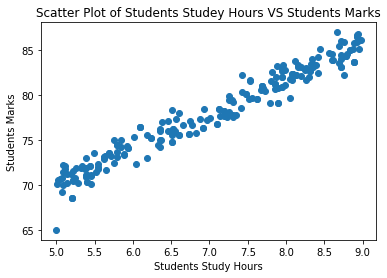

In [10]:
plt.scatter(x=data.study_hours, y=data.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students Marks")
plt.title("Scatter Plot of Students Studey Hours VS Students Marks")
plt.show()

# Data cleaning or Data preprocessing

In [14]:
data.isnull()


,study_hours,student_marks
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
224,False,False
225,True,False
226,False,False
227,False,False


In [17]:
data.isnull().sum()

study_hours      9
student_marks    0
dtype: int64

In [18]:
data.mean()

study_hours       6.986182
student_marks    77.768865
dtype: float64

In [19]:
updatedData = data.fillna(data.mean())


In [20]:
updatedData.isnull().sum()


study_hours      0
student_marks    0
dtype: int64

In [21]:
updatedData.tail()


,study_hours,student_marks
224,6.090000,76.48
225,6.986182,75.39
226,5.200000,68.57
227,8.880000,83.64
228,6.986182,76.40


# Machine Learning Algorithms

In [23]:

x = updatedData.drop("student_marks", axis = "columns")
y = updatedData.drop("study_hours", axis = "columns")
print("Shape of X: ",x.shape)
print("Shape of Y: ",y.shape)


Shape of X:  (229, 1)
Shape of Y:  (229, 1)


In [29]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 61)
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)


Shape of X_train:  (183, 1)
Shape of Y_train:  (183, 1)
Shape of X_test:  (46, 1)
Shape of Y_test:  (46, 1)


# Select a model and train it 

In [30]:
# line equation:
# y = m*x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [31]:
lr.fit(X_train, Y_train)


LinearRegression()

In [32]:
lr.coef_


array([[3.87982532]])

In [37]:
lr.intercept_


array([50.63264692])

In [44]:
lr.predict([[4]])[0][0].round(2)


66.15

In [45]:

Y_pred = lr.predict(X_test)
Y_pred


array([[74.84275693],
       [79.80893335],
       [79.38215256],
       [78.99417003],
       [78.52859099],
       [84.89150452],
       [70.96293161],
       [81.12807396],
       [82.68000409],
       [84.69751325],
       [83.9991447 ],
       [81.47725824],
       [73.32962506],
       [71.31211589],
       [85.08549579],
       [71.54490541],
       [79.65374033],
       [85.27948705],
       [74.60996741],
       [81.47725824],
       [71.50610715],
       [72.98044078],
       [77.73781205],
       [77.73781205],
       [71.54490541],
       [82.40841631],
       [75.38593248],
       [71.58370366],
       [82.68000409],
       [75.6963185 ],
       [78.683784  ],
       [77.51983641],
       [78.52859099],
       [70.8077386 ],
       [75.89030977],
       [80.19691588],
       [85.31828531],
       [75.19194121],
       [80.93408269],
       [85.43468006],
       [73.67880934],
       [82.99039011],
       [70.45855432],
       [81.63245125],
       [78.33459972],
       [80

In [47]:
pd.DataFrame(np.c_[X_test, Y_test, Y_pred], columns = ["Study_hours", "Student_marks_original", "Student_marks_predicted"])


,Study_hours,Student_marks_original,Student_marks_predicted
0,6.240000,75.18,74.842757
1,7.520000,79.56,79.808933
2,7.410000,78.61,79.382153
3,7.310000,77.59,78.994170
4,7.190000,78.21,78.528591
5,8.830000,85.04,84.891505
6,5.240000,70.78,70.962932
7,7.860000,80.72,81.128074
8,8.260000,81.70,82.680004
9,8.780000,84.35,84.697513



# Fine-tune model

In [49]:
lr.score(X_test, Y_test)


0.9602765525119779

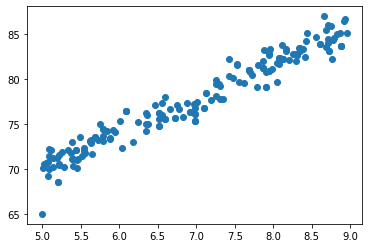

In [50]:
plt.scatter(X_train, Y_train)


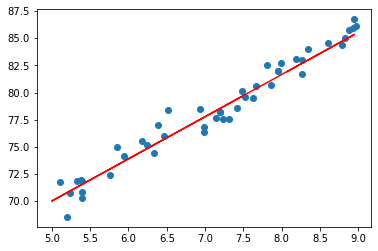

In [51]:

plt.scatter(X_test, Y_test)
plt.plot(X_train, lr.predict(X_train), color='r')


# Present your solution

In [52]:
# Save MI model

import joblib
joblib.dump(lr, "Students_Marks_prediction.pkl")

['Students_Marks_prediction.pkl']

In [53]:
model = joblib.load("Students_Marks_prediction.pkl")


In [54]:
model.predict([[5]])[0][0].round(2)

70.03